Supervised learning: known labels
i.e: Regression is a special case, and the labels are the floating number

Unsupervised learning: unknown labels, trying to figure out what the group are
i.e: Dimension reduction

In [17]:
%matplotlib inline
import sklearn
from skimage import data
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
import os
os.chdir('/Users/Tung/Dropbox/DSE/Intro to DS')

In [15]:
df = pd.read_csv('weight-height.csv')

In [16]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


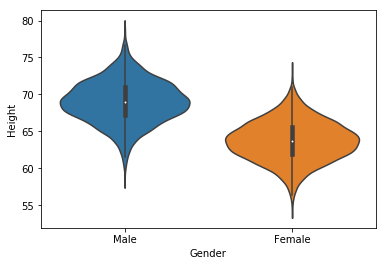

In [18]:
sns.violinplot(x='Gender',y='Height',data=df)

In [20]:
#Describe distribution of heights by gender
df[['Height','Gender']].groupby('Gender').describe() 

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              
              75%        max  
Gender                        
Female  65.563565  73.389586  
Male    70.988744  78.998742

In [22]:
from scipy import stats
rv_male = stats.norm(loc=69.02, scale = 2.863)
rv_female = stats.norm(loc=63.70, scale = 2.696)

In [23]:
heights = np.linspace(55,88,1000)
male_probs = rv_male.pdf(heights)
female_probs = rv_female.pdf(heights)

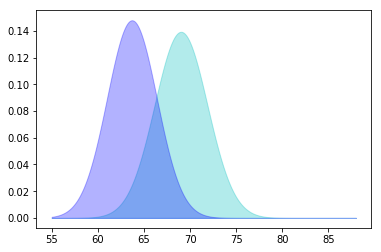

In [45]:
plt.fill_between(heights,male_probs, color = 'c', alpha =0.3)
plt.fill_between(heights,female_probs, color = 'b', alpha =0.3)

#The area in between the two curves are called the base area (error)

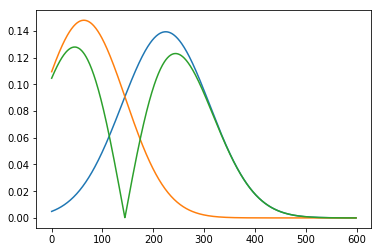

In [43]:
plt.plot(male_probs[200:-200])
plt.plot(female_probs[200:-200])
#plt.plot(male_probs - female_probs)
#looking for the value close to zero
plt.plot(np.abs(male_probs[200:-200] - female_probs[200:-200]))

In [44]:
min_index = np.argmin(np.abs(male_probs[200:-200] - female_probs[200:-200]))
min_index

599

In [52]:
from sklearn import datasets
iris = datasets.load_iris()

In [53]:
iris_df = pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns = iris['feature_names']+['target'])

In [54]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [58]:
ad= sns.scatterplot(x='sepal length (cm)', y = 'sepal length(cm)',hue = 'target',data = iris_df)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [59]:
from sklearn import neighbors as nb

In [76]:
n_neighbors = 3
clf = nb.KNeighborsClassifier(n_neighbors)

#The higher number of K is, the more smoothing the classification line is, resulting the LESS overfitting problem

In [66]:
x = iris_df.values[:,:-1]

In [68]:
y = iris_df.values[:,-1]

In [70]:
clf.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [71]:
clf.predict(x[0:1,:])

array([0.])

In [72]:
y[0]

0.0

Precision: Percentage items were accurately relevant

Recall: Percentage of the positive over all the relevant items

https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg
    

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=42)
#random state is like the seed

In [82]:
clf.fit(x_train,y_train) #Fit the training data
y_predicted = clf.predict(x_test) #test the test data

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted)) #Compare the actual label with the predicted label

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        29
        1.0       0.92      1.00      0.96        23
        2.0       1.00      0.91      0.95        23

avg / total       0.98      0.97      0.97        75



### Comparision of clusterings

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html